<a href="https://colab.research.google.com/github/Wanludrame/Neural-Network-with-TensorFlow/blob/master/NLP_literature_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-12-10 22:56:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-10 22:56:32 (159 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model.add(Embedding(total_words, 96, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 96)            308256    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 256)           230400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              3291275   
Total params: 4,159,147
Trainable params: 4,159,147
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 21s 1ms/sample - loss: 6.9495 - acc: 0.0200
Epoch 2/100
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.5022 - acc: 0.0215
Epoch 3/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.3808 - acc: 0.0254
Epoch 4/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.2516 - acc: 0.0289
Epoch 5/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.1607 - acc: 0.0354
Epoch 6/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.0756 - acc: 0.0376
Epoch 7/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 5.9924 - acc: 0.0406
Epoch 8/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 5.9094 - acc: 0.0451
Epoch 9/100
15462/15462 [==============================] - 19s 1ms/sample - loss: 5.8182 - acc: 0.0462
Epoch 10/100
15462/15462 [========================

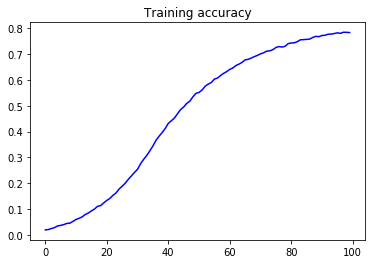

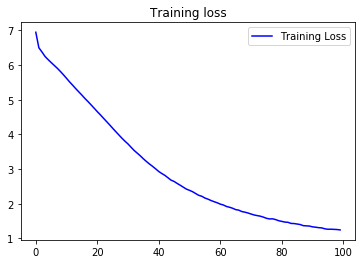

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope or me mine too give thee so chary alone so live so deem'd ' in thee are both writ live still with thee as you keeps thee for thine eyes seem true account still forbid me eyes afloat go well set me new light ' acquainted alone lived of none be seem due in me alone there ' keep well acquainted alone doth lie with her in thee so twain alone doth write her dumb make me one dwell be keep so 'will ' well doth bind mistaking live doth now die see she ' go well alone was her
